# Sample Code for deconvolution
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from deconv.deconv import Deconvolution

In [2]:
file_mix=""
file_ref=""
file_annotation_ref="D:/Gdrive/datasource/ann_file/Rat_transcriptID_RGD.csv"

#df_mix=pd.read_csv(file_mix, index_col=0)
#df_ref=pd.read_csv(file_ref, index_col=0)
df_annotation_ref=pd.read_csv(file_annotation_ref)

In [3]:
df = pd.read_csv("D:/Gdrive/notebook/2004_Transcriptome_Deconvolution/220217_RNAseq_reanalysis/data/gene.txt",index_col=0,delimiter="\t")
df_mix = df.loc[:,(df.columns.str.contains("liver")) | (df.columns.str.contains("wbc")) | (df.columns.str.contains("spleen"))]
df_ref = df.drop(df_mix.columns.tolist(), axis=1)

In [4]:
dat = Deconvolution()

In [5]:
dat.set_data(df_mix, df_ref)

In [6]:
dat.preprocessing_mix(df_ref=df_annotation_ref, places=[0,1],
                      trimming=True,batch=False,combat=False,
                      trans_method="log2",
                      norm_method_list=["quantile"])

dat.preprocessing_ref(df_ref=df_annotation_ref, places=[0,1],
                      trimming=False,batch=False,combat=False,
                      trans_method="log2",
                      norm_method_list=["raw"])

annotation
trimming
tranformation
1 : quantile


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


normalization
1 : raw


method : ttest
extracted genes number = 6042


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


extracted genes number = 2169


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


extracted genes number = 4918


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


extracted genes number = 4320
not enough genes picked up


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


extracted genes number = 4838


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


extracted genes number = 2522
signature genes : 773


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


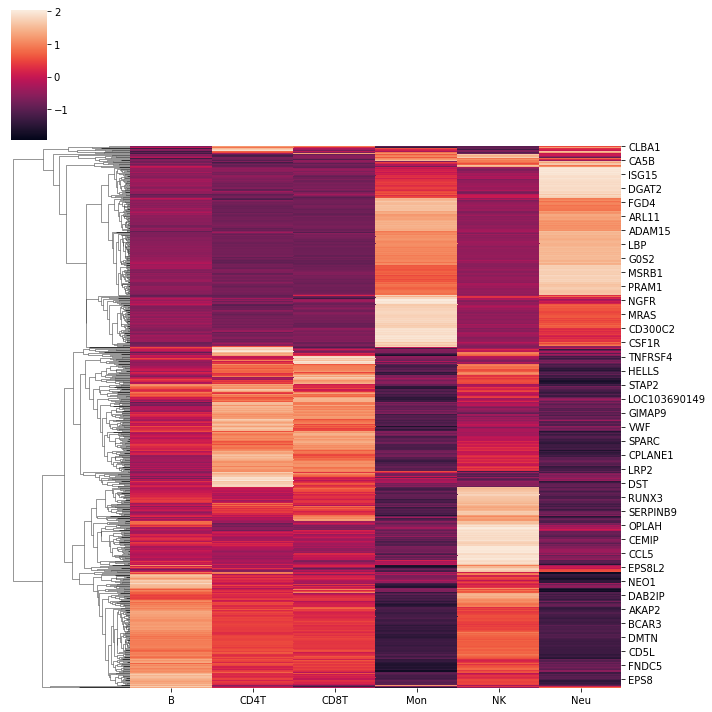

In [7]:
dat.deg(method="ttest",
        sep="_",number=150,limit_CV=1,limit_FC=1.,log2=False,q_limit=0.05,
        plot=True)

In [8]:
dat.fit(method="elasticnet")

method:  elasticnet
0 rows are removed
0 rows are removed
model score: 0.33748858284293726


In [9]:
dat.get_data()[0] # mix data

,liver_apap_1,liver_apap_2,liver_apap_3,liver_apap_4,liver_apap_5,liver_ctrl_1,liver_ctrl_2,liver_ctrl_3,liver_ctrl_4,liver_ctrl_5,...,spleen_1,spleen_2,spleen_3,spleen_4,spleen_5,wbc_1,wbc_2,wbc_3,wbc_4,wbc_5
A2ML1,4.171892,4.368763,2.679840,3.457114,3.352063,3.051128,3.692861,3.046806,4.147998,4.088962,...,0.687839,2.738042,2.142524,1.767811,1.708707,2.063018,2.317794,3.161509,2.396825,3.121917
A3GALT2,4.777583,5.135787,4.406078,5.164614,4.820383,4.579940,2.922225,4.356737,4.302464,2.955057,...,5.358663,5.301582,4.990571,5.275613,5.340321,4.177978,4.500131,4.859896,4.592598,4.904986
AAAS,6.296436,6.340145,6.170978,6.256932,6.196240,5.989640,5.876509,5.987445,5.916353,5.877821,...,6.104736,6.114602,6.102993,6.115497,6.031997,5.894273,5.799512,5.682490,5.892925,6.002100
AACS,5.084872,5.340559,5.179738,4.780748,4.892280,5.898287,5.492364,5.522481,5.582882,5.536895,...,6.277818,6.294675,6.189399,6.302376,6.280773,6.378833,6.343202,6.436363,6.334977,6.341985
AAGAB,6.100605,6.268855,6.080500,5.974795,6.046206,6.077183,6.050617,6.014483,5.863288,6.029056,...,6.559908,6.500956,6.467008,6.508072,6.494771,6.286339,6.250032,6.259199,6.172023,6.348596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ3,5.059501,5.089095,5.379766,5.129119,5.199992,5.057159,4.907567,4.880658,5.111144,5.095581,...,5.642742,5.567245,5.584156,5.576639,5.610687,5.697179,5.600893,5.650504,5.655223,5.619316
MRPL11,6.661719,6.517437,6.557653,6.536132,6.539822,6.622350,6.611776,6.615163,6.561614,6.573712,...,6.151907,6.081989,6.098274,6.097971,6.114829,5.910433,5.983458,5.966022,6.006913,6.090774
MRPL24,6.635006,6.663041,6.608876,6.641167,6.572851,6.548315,6.461192,6.511042,6.434946,6.351644,...,6.378661,6.346775,6.319169,6.367975,6.378208,6.330969,6.304709,6.234951,6.333053,6.326023
MRPL9,6.403059,6.467155,6.405453,6.418367,6.382982,6.308071,6.250743,6.390397,6.448732,6.398578,...,6.653467,6.607990,6.622350,6.636533,6.653027,6.562646,6.524847,6.505730,6.575887,6.590958


In [10]:
dat.get_data()[1] # ref data

,Mon_5,B_1,B_2,B_3,B_4,B_5,B_6,CD4T_1,CD4T_2,CD4T_3,...,Neu_3,Neu_4,Neu_5,Neu_6,NK_1,NK_2,NK_3,NK_4,NK_5,NK_6
A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1CF,1.917041,0.000000,0.000000,0.000000,0.536623,0.749090,0.289926,0.000000,0.000000,0.305709,...,0.343877,0.350853,0.000000,0.845547,0.000000,0.000000,0.000000,0.555396,0.297339,0.000000
A2M,0.000000,1.487224,1.537942,0.524679,0.707685,0.513098,1.537140,0.164129,0.169150,0.546472,...,0.490985,0.000000,0.000000,0.179374,0.310239,0.185210,1.068251,0.739119,1.087921,0.852808
A2ML1,1.255521,1.786561,0.998844,0.917930,1.223184,1.232711,1.687522,0.790131,1.809739,1.521277,...,0.627395,0.000000,0.000000,0.341491,1.298917,3.419195,2.442018,1.399680,1.243419,1.733623
A3GALT2,5.557582,4.816717,5.585095,4.594804,4.694271,4.310881,4.629785,3.725194,4.499781,4.319475,...,3.704725,3.313323,1.730822,4.792776,4.216264,4.259992,5.425130,5.212667,5.539806,4.441381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MRPL11,7.583597,7.871143,7.749989,7.587909,7.658721,7.719543,7.922954,7.915317,7.506486,7.823560,...,6.535465,6.029931,4.979148,6.694329,7.780850,7.610058,8.182406,7.811371,7.895387,7.884946
MRPL24,8.103654,8.467446,8.776172,8.361930,8.051174,8.429524,8.462320,8.778465,8.814563,8.666892,...,7.214256,7.191661,5.891028,7.916443,8.453455,8.442615,8.679606,8.601010,8.509067,8.387032
MRPL9,8.878859,9.119133,9.188242,8.821991,8.643862,8.871707,9.115993,9.238755,8.859089,9.092360,...,8.161771,8.171186,6.592357,8.669987,8.903112,8.920920,9.286540,9.337274,9.143264,9.088537
RNF141,9.396386,7.986987,8.114582,7.830445,7.636022,7.509279,7.848900,7.920426,7.428591,7.925638,...,8.243592,8.548072,6.941688,8.981032,7.932717,7.982940,7.275819,7.951991,8.043913,8.084261


In [12]:
dat.get_data()[2] # reference matrix

,B,CD4T,CD8T,Mon,NK,Neu
UBE2Q2L,4.067965,3.937985,3.688142,2.496551,6.377228,4.420924
DNASE2B,3.131231,2.395820,2.648317,4.778933,3.695496,7.830362
BTG3,7.024362,5.826770,5.921869,5.217145,6.295500,4.514722
CASTOR1,5.101510,5.766280,4.211267,4.774645,4.472333,4.526286
PLEK2,4.268419,3.486914,3.293703,0.537386,3.706866,0.652470
...,...,...,...,...,...,...
TNFSF13,6.748283,6.212415,6.257585,10.367265,6.734800,9.328266
AKAP2,7.195798,6.236059,6.895361,4.273324,6.506765,3.872548
GZMM,11.561187,10.916939,12.031797,9.859231,14.340722,10.027372
PROSER2,2.791149,1.533664,1.805223,1.360205,3.899127,1.952887


In [13]:
dat.get_res() # deconvolution result

,B,CD4T,CD8T,Mon,NK,Neu
liver_apap_1,0.019184,-0.031083,-0.027067,0.019458,-0.000000,0.047001
liver_apap_2,0.036571,-0.044764,-0.048988,0.008359,-0.000650,0.050079
liver_apap_3,0.015900,-0.038260,-0.041739,0.020647,-0.000000,0.054218
liver_apap_4,0.038867,-0.050386,-0.027481,0.022532,0.000000,0.042313
liver_apap_5,0.017044,-0.020135,-0.025081,0.020389,0.000000,0.027136
liver_ctrl_1,0.048748,-0.020959,-0.001581,0.008420,0.000000,0.000000
liver_ctrl_2,0.000000,-0.000000,-0.011308,0.008132,0.000000,0.010199
liver_ctrl_3,0.030111,-0.015191,-0.011231,0.008002,-0.000000,0.000000
liver_ctrl_4,0.013782,-0.001837,-0.005289,0.000000,0.000000,0.000000
liver_ctrl_5,0.017099,-0.000000,-0.000000,0.004770,0.000000,0.000000
